# Hyperparamter optimization for XGBOOST

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [39]:
df=pd.read_csv('C:/Users/Admin/Desktop/Practisse/Churn_Modelling.csv')

In [40]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [42]:
df.shape

(10000, 14)

In [43]:
len(df)

10000

In [44]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
df.isnull().values.any()

False

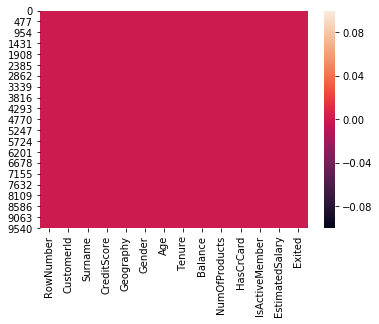

In [46]:
sns.heatmap(df.isnull())

In [47]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [48]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [50]:
geography=pd.get_dummies(df['Geography'],drop_first=True)

In [51]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [52]:
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [53]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [54]:
X=X.drop(columns=['Geography','Gender'],axis=1)

In [56]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [57]:
X=pd.concat([X,gender,geography],axis=1)

In [59]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [60]:
#Hyper parameter optimization

In [61]:
import xgboost

In [67]:
params={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
    }

In [65]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [66]:
classifier=xgboost.XGBClassifier()

In [69]:
randomsearch=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

In [72]:
randomsearch.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3, score=0.866, total=   0.9s
[CV] min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3, score=0.864, total=   0.7s
[CV] min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3, score=0.859, total=   0.7s
[CV] min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3, score=0.863, total=   0.7s
[CV] min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3, score=0.857, total=   0.7s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, score=0.858, total=   1.7s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, score=0.854, total=   1.7s
[CV] min_child_weight=3, max_depth=12

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   35.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=None,
                   param_distri

In [73]:
randomsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
randomsearch.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [75]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
score=cross_val_score(classifier,X,y,cv=10)

In [80]:
score.mean()

0.8651993197993197